In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import matplotlib
matplotlib.rc('text', usetex=True)
matplotlib.rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})

BIG_SIZE = 14
BIGGER_SIZE = 16
BIGGEST_SIZE = 20

matplotlib.rc('axes', titlesize=BIG_SIZE)     # fontsize of the axes title
matplotlib.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
matplotlib.rc('xtick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('ytick', labelsize=BIG_SIZE)    # fontsize of the tick labels
matplotlib.rc('legend', fontsize=BIGGEST_SIZE)    # legend fontsize
matplotlib.rc('figure', titlesize=BIGGEST_SIZE)  # fontsize of the figure title

In [9]:
data_cg1 = np.load('../../../deterministic/224x32/data_at_more_obs_points_config1/coarse_grained_vel_temp_data_t=25.0_to_t=35.0_grid_32_more_obs_config1.npz')
data_cg2 = np.load('../../../deterministic/224x32/data_at_more_obs_points_config1/coarse_grained_vel_temp_data_t=35.0_to_t=45.0_grid_32_more_obs_config1.npz')


In [10]:
ua_truth_t1 = data_cg1['ua_truth'] # t25 to t35
ua_truth_t2 = data_cg2['ua_truth'] # t35 to t45
Ta_truth_t1 = data_cg1['Ta_truth'] # t25 to t35
Ta_truth_t2 = data_cg2['Ta_truth'] # t35 to t45

In [11]:
ua_truth_t1.shape, ua_truth_t2.shape

((10, 84, 2), (11, 84, 2))

In [12]:
gridpoints = data_cg1['gridpoints']
print(f'gridpoints: {gridpoints}')

gridpoints: [[0.   0.25]
 [0.25 0.25]
 [0.5  0.25]
 [0.75 0.25]
 [1.   0.25]
 [1.25 0.25]
 [1.5  0.25]
 [1.75 0.25]
 [2.   0.25]
 [2.25 0.25]
 [2.5  0.25]
 [2.75 0.25]
 [3.   0.25]
 [3.25 0.25]
 [3.5  0.25]
 [3.75 0.25]
 [4.   0.25]
 [4.25 0.25]
 [4.5  0.25]
 [4.75 0.25]
 [5.   0.25]
 [5.25 0.25]
 [5.5  0.25]
 [5.75 0.25]
 [6.   0.25]
 [6.25 0.25]
 [6.5  0.25]
 [6.75 0.25]
 [0.   0.5 ]
 [0.25 0.5 ]
 [0.5  0.5 ]
 [0.75 0.5 ]
 [1.   0.5 ]
 [1.25 0.5 ]
 [1.5  0.5 ]
 [1.75 0.5 ]
 [2.   0.5 ]
 [2.25 0.5 ]
 [2.5  0.5 ]
 [2.75 0.5 ]
 [3.   0.5 ]
 [3.25 0.5 ]
 [3.5  0.5 ]
 [3.75 0.5 ]
 [4.   0.5 ]
 [4.25 0.5 ]
 [4.5  0.5 ]
 [4.75 0.5 ]
 [5.   0.5 ]
 [5.25 0.5 ]
 [5.5  0.5 ]
 [5.75 0.5 ]
 [6.   0.5 ]
 [6.25 0.5 ]
 [6.5  0.5 ]
 [6.75 0.5 ]
 [0.   0.75]
 [0.25 0.75]
 [0.5  0.75]
 [0.75 0.75]
 [1.   0.75]
 [1.25 0.75]
 [1.5  0.75]
 [1.75 0.75]
 [2.   0.75]
 [2.25 0.75]
 [2.5  0.75]
 [2.75 0.75]
 [3.   0.75]
 [3.25 0.75]
 [3.5  0.75]
 [3.75 0.75]
 [4.   0.75]
 [4.25 0.75]
 [4.5  0.75]
 [4.75 0.75]


In [13]:
ua_truth = np.concatenate((ua_truth_t1, ua_truth_t2), axis=0)
Ta_truth = np.concatenate((Ta_truth_t1, Ta_truth_t2), axis=0)

In [14]:
ua_truth.shape, Ta_truth.shape

((21, 84, 2), (21, 84))

In [15]:
n_tsteps = 21 
n_obs_points = gridpoints.shape[0]
n_stoch = 50

In [18]:
vel_x_mean_mat = np.zeros((n_tsteps,n_obs_points))
vel_x_std_mat = np.zeros((n_tsteps,n_obs_points))

vel_y_mean_mat = np.zeros((n_tsteps,n_obs_points))
vel_y_std_mat = np.zeros((n_tsteps,n_obs_points))

temp_data_mean_mat = np.zeros((n_tsteps,n_obs_points))
temp_data_std_mat = np.zeros((n_tsteps,n_obs_points))

vel_x_rmse_mat = np.zeros((n_tsteps,n_obs_points))
vel_y_rmse_mat = np.zeros((n_tsteps,n_obs_points))
temp_rmse_mat = np.zeros((n_tsteps,n_obs_points))

for l in range(n_obs_points):
    vel_x_data_stoch_mat = np.zeros((n_tsteps,n_stoch)) # at a location
    vel_y_data_stoch_mat = np.zeros((n_tsteps,n_stoch))
    temp_data_stoch_mat = np.zeros((n_tsteps,n_stoch)) # at a location

    for k in range(n_stoch):
        data_stoch = np.load('../data_stoch_more_obs/vel_temp_data_particle_'+str(k+1)+'_var_99_grid_32_t25_onwards_OU_rand_ic_m_obs.npz')

        vel_data_stoch = data_stoch['ua_data_sto']  
        vel_x_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 0]
        vel_y_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 1]

        temp_data_stoch = data_stoch['Ta_data_sto'] 
        temp_data_stoch_mat[:,k] = temp_data_stoch[:n_tsteps,l]


    vel_x_rmse = np.sqrt(np.mean(np.square(vel_x_data_stoch_mat - ua_truth[:n_tsteps,l,0].reshape((-1,1))), axis = 1, keepdims=True))
    vel_y_rmse = np.sqrt(np.mean(np.square(vel_y_data_stoch_mat - ua_truth[:n_tsteps,l,1].reshape((-1,1))), axis = 1, keepdims=True))
    temp_rmse = np.sqrt(np.mean(np.square(temp_data_stoch_mat - Ta_truth[:n_tsteps,l].reshape((-1,1))), axis = 1, keepdims=True))

    vel_x_data_mean = np.mean(vel_x_data_stoch_mat, axis = 1, keepdims=True)
    vel_x_data_std = np.std(vel_x_data_stoch_mat, axis = 1, keepdims=True)

    vel_y_data_mean = np.mean(vel_y_data_stoch_mat, axis = 1, keepdims=True)
    vel_y_data_std = np.std(vel_y_data_stoch_mat, axis = 1, keepdims=True)

    temp_data_mean = np.mean(temp_data_stoch_mat, axis = 1, keepdims=True)
    temp_data_std = np.std(temp_data_stoch_mat, axis = 1, keepdims=True)

    vel_x_mean_mat[:,l] = vel_x_data_mean[:,0]
    vel_x_std_mat[:,l] = vel_x_data_std[:,0]

    vel_y_mean_mat[:,l] = vel_y_data_mean[:,0]
    vel_y_std_mat[:,l] = vel_y_data_std[:,0]

    temp_data_mean_mat[:,l] = temp_data_mean[:,0]
    temp_data_std_mat[:,l] = temp_data_std[:,0]

    vel_x_rmse_mat[:,l] =  vel_x_rmse[:,0]
    vel_y_rmse_mat[:,l] =  vel_y_rmse[:,0]
    temp_rmse_mat[:,l] = temp_rmse[:,0]

ux_spread_sto = vel_x_std_mat
uy_spread_sto = vel_y_std_mat
temp_spread_sto = temp_data_std_mat

ux_rmse_sto = vel_x_rmse_mat
uy_rmse_sto = vel_y_rmse_mat
temp_rmse_sto = temp_rmse_mat

In [19]:
vel_x_mean_mat = np.zeros((n_tsteps,n_obs_points))
vel_x_std_mat = np.zeros((n_tsteps,n_obs_points))

vel_y_mean_mat = np.zeros((n_tsteps,n_obs_points))
vel_y_std_mat = np.zeros((n_tsteps,n_obs_points))

temp_data_mean_mat = np.zeros((n_tsteps,n_obs_points))
temp_data_std_mat = np.zeros((n_tsteps,n_obs_points))

vel_x_rmse_mat = np.zeros((n_tsteps,n_obs_points))
vel_y_rmse_mat = np.zeros((n_tsteps,n_obs_points))
temp_rmse_mat = np.zeros((n_tsteps,n_obs_points))

for l in range(n_obs_points):
    vel_x_data_stoch_mat = np.zeros((n_tsteps,n_stoch)) # at a location
    vel_y_data_stoch_mat = np.zeros((n_tsteps,n_stoch))
    temp_data_stoch_mat = np.zeros((n_tsteps,n_stoch)) # at a location

    for k in range(n_stoch):
        data_stoch = np.load('../data_stoch_more_obs/vel_temp_data_ensem_sim_no_xi_det_ocean_particle_'+str(k+1)+'_grid_32_t25_onwards_rand_ic_m_obs.npz')

        vel_data_stoch = data_stoch['ua_data_sto']  
        vel_x_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 0]
        vel_y_data_stoch_mat[:,k] = vel_data_stoch[:n_tsteps,l, 1]

        temp_data_stoch = data_stoch['Ta_data_sto'] 
        temp_data_stoch_mat[:,k] = temp_data_stoch[:n_tsteps,l]


    vel_x_rmse = np.sqrt(np.mean(np.square(vel_x_data_stoch_mat - ua_truth[:n_tsteps,l,0].reshape((-1,1))), axis = 1, keepdims=True))
    vel_y_rmse = np.sqrt(np.mean(np.square(vel_y_data_stoch_mat - ua_truth[:n_tsteps,l,1].reshape((-1,1))), axis = 1, keepdims=True))
    temp_rmse = np.sqrt(np.mean(np.square(temp_data_stoch_mat - Ta_truth[:n_tsteps,l].reshape((-1,1))), axis = 1, keepdims=True))

    vel_x_data_mean = np.mean(vel_x_data_stoch_mat, axis = 1, keepdims=True)
    vel_x_data_std = np.std(vel_x_data_stoch_mat, axis = 1, keepdims=True)

    vel_y_data_mean = np.mean(vel_y_data_stoch_mat, axis = 1, keepdims=True)
    vel_y_data_std = np.std(vel_y_data_stoch_mat, axis = 1, keepdims=True)

    temp_data_mean = np.mean(temp_data_stoch_mat, axis = 1, keepdims=True)
    temp_data_std = np.std(temp_data_stoch_mat, axis = 1, keepdims=True)

    vel_x_mean_mat[:,l] = vel_x_data_mean[:,0]
    vel_x_std_mat[:,l] = vel_x_data_std[:,0]

    vel_y_mean_mat[:,l] = vel_y_data_mean[:,0]
    vel_y_std_mat[:,l] = vel_y_data_std[:,0]

    temp_data_mean_mat[:,l] = temp_data_mean[:,0]
    temp_data_std_mat[:,l] = temp_data_std[:,0]

    vel_x_rmse_mat[:,l] =  vel_x_rmse[:,0]
    vel_y_rmse_mat[:,l] =  vel_y_rmse[:,0]
    temp_rmse_mat[:,l] = temp_rmse[:,0]

ux_spread_det = vel_x_std_mat
uy_spread_det = vel_y_std_mat
temp_spread_det = temp_data_std_mat

ux_rmse_det = vel_x_rmse_mat
uy_rmse_det = vel_y_rmse_mat
temp_rmse_det = temp_rmse_mat

# Plotting RMSE and spread

[Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$')]

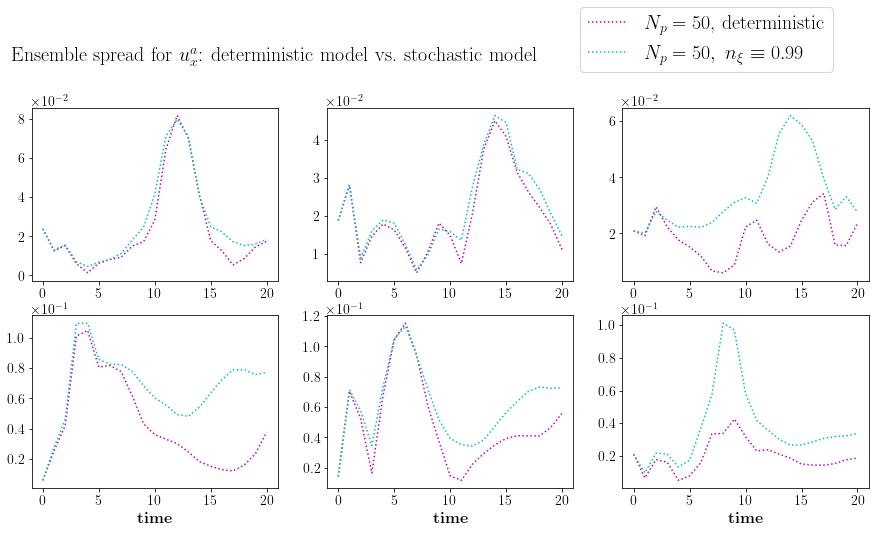

In [21]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
obs_p = [14, 42, 70, 50, 78, 64]
n = 0
c1 = 'm'
c2 = 'c'
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(ux_spread_det[:,obs_p[n]], linestyle='dotted', color=c1, label=r'$N_p = 50$, deterministic')
        ax[i,j].plot(ux_spread_sto[:,obs_p[n]], linestyle='dotted', color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=1) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'Ensemble spread for $u_x^a$: deterministic model vs. stochastic model', x = 0.35, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
# plt.savefig('../plots/rand_ic/spread_ux_det_v_stoch_50_part_var_99_ensem.pdf',bbox_inches='tight')

[Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$')]

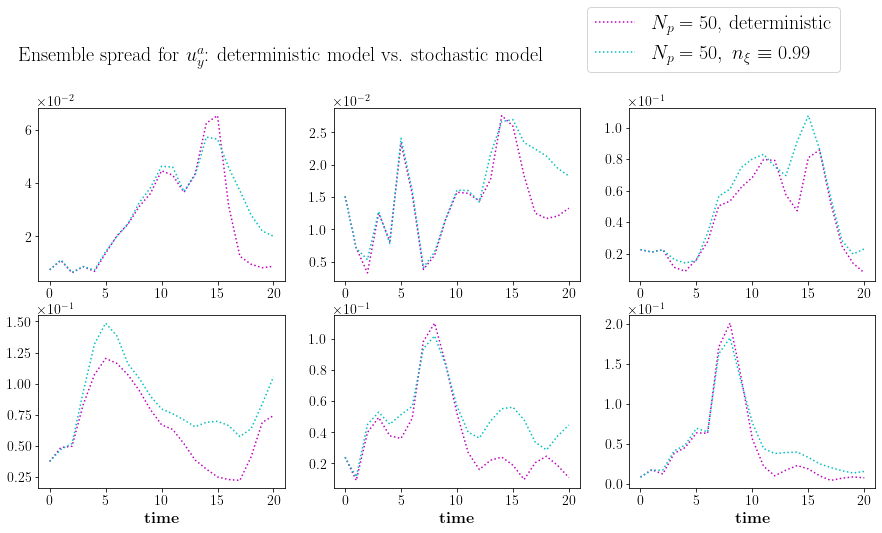

In [22]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
c1 = 'm'
c2 = 'c'
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(uy_spread_det[:,obs_p[n]], linestyle='dotted', color=c1, label=r'$N_p = 50$, deterministic')
        ax[i,j].plot(uy_spread_sto[:,obs_p[n]], linestyle='dotted', color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=1) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'Ensemble spread for $u_y^a$: deterministic model vs. stochastic model', x = 0.35, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
# plt.savefig('../plots/rand_ic/spread_uy_det_v_stoch_50_part_var_99_ensem.pdf',bbox_inches='tight')

[Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$')]

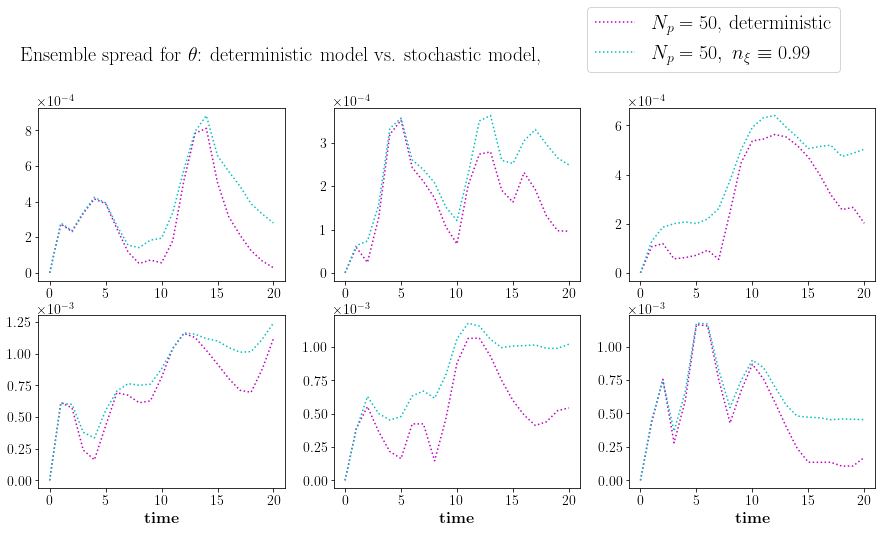

In [23]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
c1 = 'm'
c2 = 'c'
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(temp_spread_det[:,obs_p[n]], linestyle='dotted', color=c1, label=r'$N_p = 50$, deterministic')
        ax[i,j].plot(temp_spread_sto[:,obs_p[n]], linestyle='dotted', color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=1) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'Ensemble spread for $\theta$: deterministic model vs. stochastic model,  ', x = 0.35, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')

[Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$')]

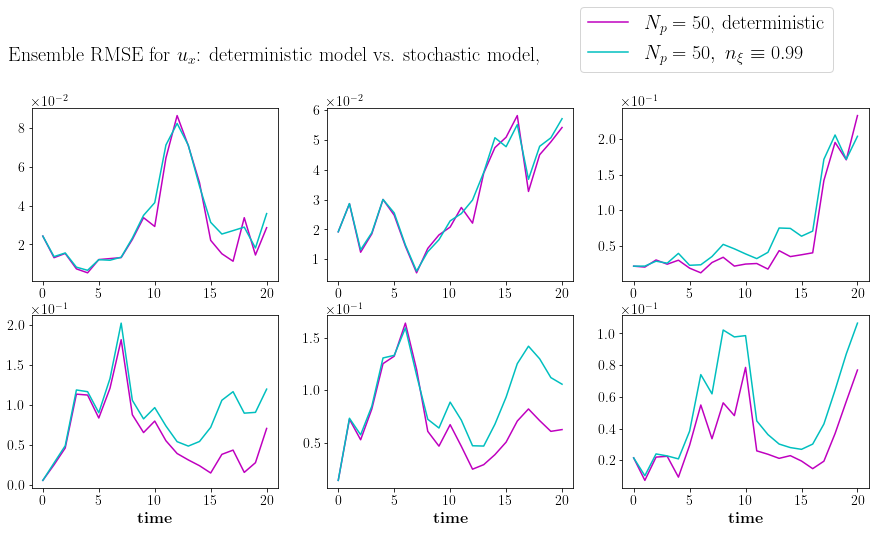

In [24]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
c1 = 'm'
c2 = 'c'
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(ux_rmse_det[:,obs_p[n]], color=c1, label=r'$N_p = 50$, deterministic')
        ax[i,j].plot(ux_rmse_sto[:,obs_p[n]], color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=1) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'Ensemble RMSE for $u_x$: deterministic model vs. stochastic model,  ', x = 0.35, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')

[Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$')]

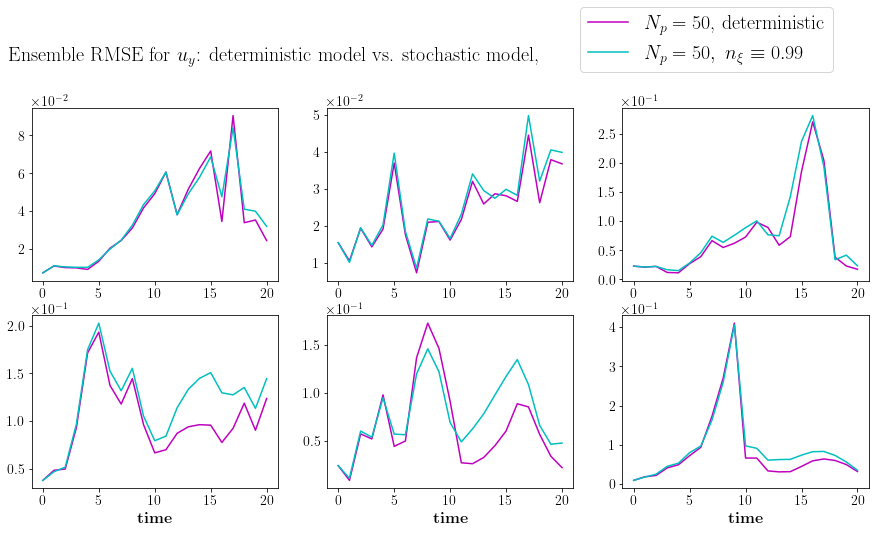

In [25]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
c1 = 'm'
c2 = 'c'
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(uy_rmse_det[:,obs_p[n]], color=c1, label=r'$N_p = 50$, deterministic')
        ax[i,j].plot(uy_rmse_sto[:,obs_p[n]], color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=1) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'Ensemble RMSE for $u_y$: deterministic model vs. stochastic model,  ', x = 0.35, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')

[Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$'),
 Text(0.5, 0, '${ \\bf time }$')]

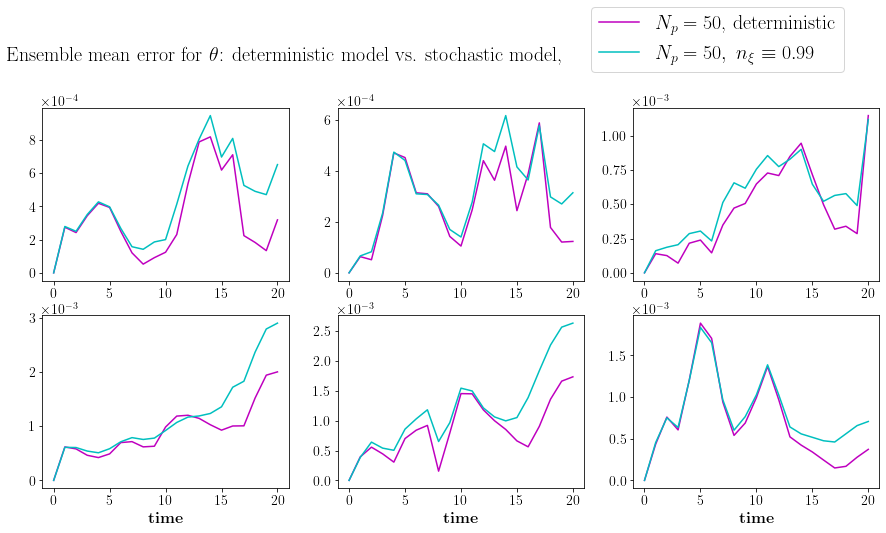

In [26]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
c1 = 'm'
c2 = 'c'
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(temp_rmse_det[:,obs_p[n]], color=c1, label=r'$N_p = 50$, deterministic')
        ax[i,j].plot(temp_rmse_sto[:,obs_p[n]], color=c2, label=r'$N_p = 50, \ n_{\xi}\equiv 0.99$')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.75, 1.1), ncol=1) # positions the legend above the top of the plot without overlapping. 
# The 0.5 places it in the center, while 1.1 moves it slightly above the top of the figure.
# set labels
fig.suptitle(r'Ensemble mean error for $\theta$: deterministic model vs. stochastic model,  ', x = 0.35, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')

# RMSE and spread in the same plot

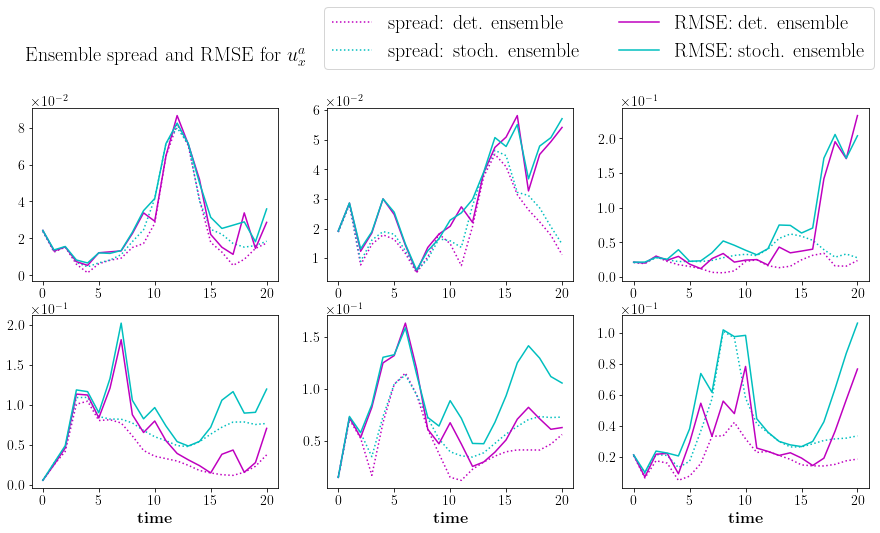

In [89]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
c1 = 'm'
c2 = 'c'
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(ux_spread_det[:,obs_p[n]], linestyle='dotted', color=c1, label=r'spread: det. ensemble')
        ax[i,j].plot(ux_spread_sto[:,obs_p[n]], linestyle='dotted', color=c2, label=r'spread: stoch. ensemble')

        ax[i,j].plot(ux_rmse_det[:,obs_p[n]], color=c1, label=r'RMSE: det. ensemble')
        ax[i,j].plot(ux_rmse_sto[:,obs_p[n]], color=c2, label=r'RMSE: stoch. ensemble')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.65, 1.1), ncol=2)
fig.suptitle(r'Ensemble spread and RMSE for $u_x^a$', x = 0.25, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
plt.savefig('../plots/rand_ic/uq_spread_rmse_ux_det_ensem_v_sto_ensem_t25_onwards_rand_ic.pdf', bbox_inches='tight')

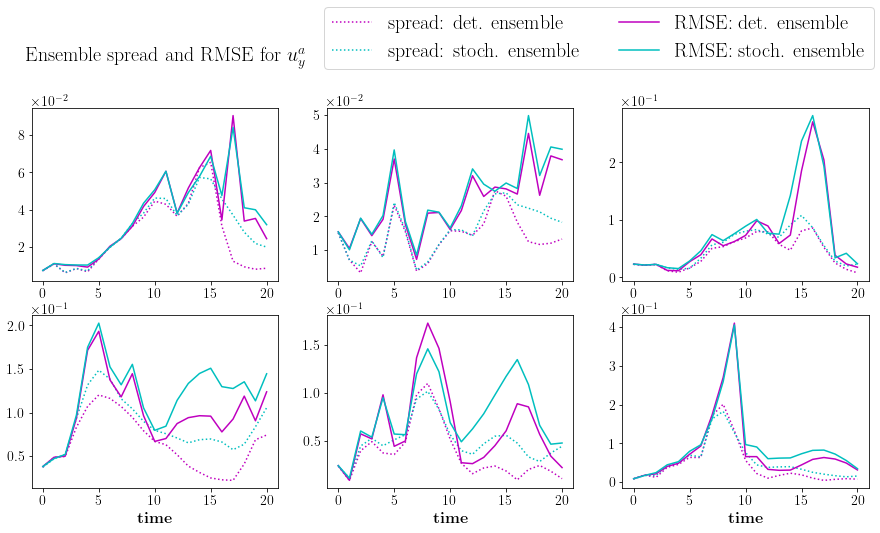

In [90]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
c1 = 'm'
c2 = 'c'
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(uy_spread_det[:,obs_p[n]], linestyle='dotted', color=c1, label=r'spread: det. ensemble')
        ax[i,j].plot(uy_spread_sto[:,obs_p[n]], linestyle='dotted', color=c2, label=r'spread: stoch. ensemble')

        ax[i,j].plot(uy_rmse_det[:,obs_p[n]], color=c1, label=r'RMSE: det. ensemble')
        ax[i,j].plot(uy_rmse_sto[:,obs_p[n]], color=c2, label=r'RMSE: stoch. ensemble')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.65, 1.1), ncol=2)
fig.suptitle(r'Ensemble spread and RMSE for $u_y^a$', x = 0.25, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
plt.savefig('../plots/rand_ic/uq_spread_rmse_uy_det_ensem_v_sto_ensem_t25_onwards_rand_ic.pdf', bbox_inches='tight')

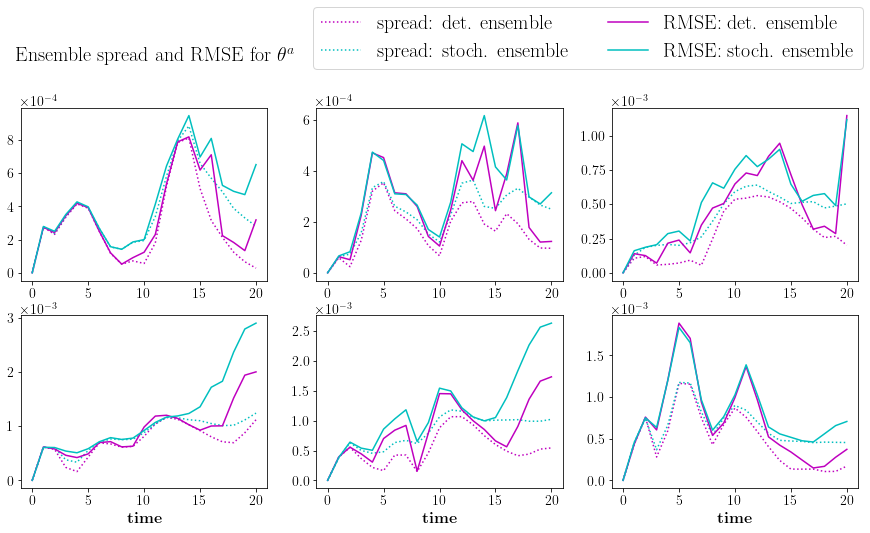

In [91]:
fig, ax = plt.subplots(2,3, figsize=(15, 7))
n = 0
c1 = 'm'
c2 = 'c'
for i in [1,0]:
    for j in [0,1,2]:
        ax[i,j].plot(temp_spread_det[:,obs_p[n]], linestyle='dotted', color=c1, label=r'spread: det. ensemble')
        ax[i,j].plot(temp_spread_sto[:,obs_p[n]], linestyle='dotted', color=c2, label=r'spread: stoch. ensemble')

        ax[i,j].plot(temp_rmse_det[:,obs_p[n]], color=c1, label=r'RMSE: det. ensemble')
        ax[i,j].plot(temp_rmse_sto[:,obs_p[n]], color=c2, label=r'RMSE: stoch. ensemble')
        ax[i,j].ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
        n += 1
handles, labels = ax[0,0].get_legend_handles_labels()
fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.65, 1.1), ncol=2)
fig.suptitle(r'Ensemble spread and RMSE for $\theta^a$', x = 0.25, y = 1)
plt.setp(ax[-1, :], xlabel=r'${ \bf time }$')
plt.savefig('../plots/rand_ic/uq_spread_rmse_temp_det_ensem_v_sto_ensem_t25_onwards_rand_ic.pdf', bbox_inches='tight')

# Average of spread and RMSE over all observation points

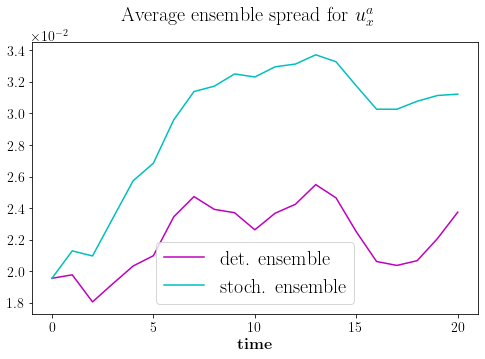

In [92]:
fig, ax = plt.subplots(1,figsize=(8, 5))

ax.plot(np.mean(ux_spread_det, axis=1), color=c1, label=r'det. ensemble')
ax.plot(np.mean(ux_spread_sto, axis=1), color=c2, label=r'stoch. ensemble')

# ax.plot(np.mean(ux_rmse_det, axis=1), color=c1, label=r'RMSE: det. ensemble')
# ax.plot(np.mean(ux_rmse_sto, axis=1), color=c2, label=r'RMSE: stoch. ensemble')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,n_tsteps,5))
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.68, 1.1), ncol=2) 
ax.legend()
fig.suptitle(r'Average ensemble spread for $u_x^a$ ')
ax.set_xlabel(r'${ \bf time }$')
plt.savefig('../plots/rand_ic/uq_avg_spread_ux_det_ensem_v_sto_ensem_t25_onwards_rand_ic.pdf', bbox_inches='tight')

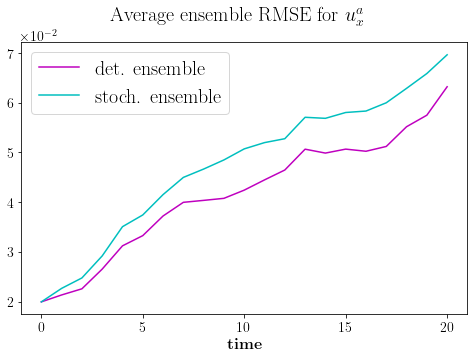

In [93]:
fig, ax = plt.subplots(1,figsize=(8, 5))

# ax.plot(np.mean(ux_spread_det, axis=1), linestyle='dotted', color=c1, label=r'spread: det. ensemble')
# ax.plot(np.mean(ux_spread_sto, axis=1), linestyle='dotted', color=c2, label=r'spread: stoch. ensemble')
ax.plot(np.mean(ux_rmse_det, axis=1), color=c1, label=r'det. ensemble')
ax.plot(np.mean(ux_rmse_sto, axis=1), color=c2, label=r'stoch. ensemble')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,n_tsteps,5))
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.68, 1.1), ncol=2) 
ax.legend()
fig.suptitle(r'Average ensemble RMSE for $u_x^a$ ')
ax.set_xlabel(r'${ \bf time }$')
plt.savefig('../plots/rand_ic/uq_avg_rmse_ux_det_ensem_v_sto_ensem_t25_onwards_rand_ic.pdf', bbox_inches='tight')

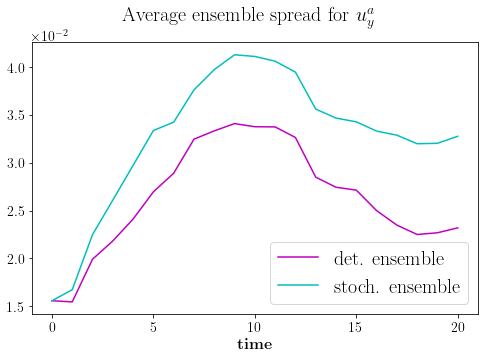

In [94]:
fig, ax = plt.subplots(1,figsize=(8, 5))

ax.plot(np.mean(uy_spread_det, axis=1), color=c1, label=r'det. ensemble')
ax.plot(np.mean(uy_spread_sto, axis=1), color=c2, label=r'stoch. ensemble')

ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,n_tsteps,5))
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.68, 1.1), ncol=2) 
ax.legend()
fig.suptitle(r'Average ensemble spread for $u_y^a$ ')
ax.set_xlabel(r'${ \bf time }$')
plt.savefig('../plots/rand_ic/uq_avg_spread_uy_det_ensem_v_sto_ensem_t25_onwards_rand_ic.pdf', bbox_inches='tight')

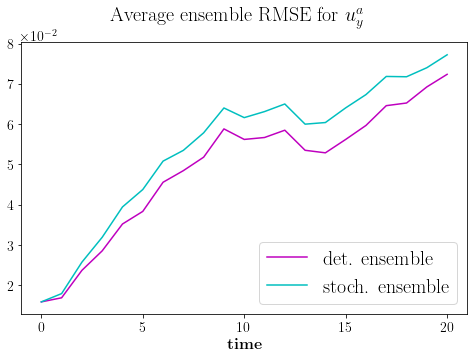

In [95]:
fig, ax = plt.subplots(1,figsize=(8, 5))

ax.plot(np.mean(uy_rmse_det, axis=1), color=c1, label=r'det. ensemble')
ax.plot(np.mean(uy_rmse_sto, axis=1), color=c2, label=r'stoch. ensemble')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,n_tsteps,5))
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.68, 1.1), ncol=2) 
ax.legend()
fig.suptitle(r'Average ensemble RMSE for $u_y^a$ ')
ax.set_xlabel(r'${ \bf time }$')
plt.savefig('../plots/rand_ic/uq_avg_rmse_uy_det_ensem_v_sto_ensem_t25_onwards_rand_ic.pdf', bbox_inches='tight')

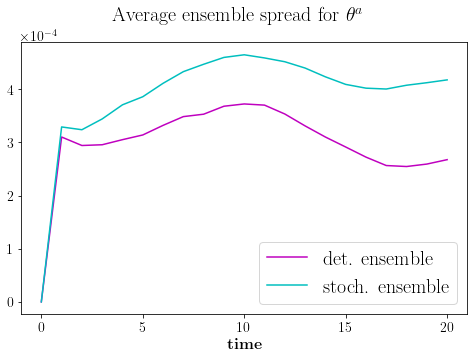

In [96]:
fig, ax = plt.subplots(1,figsize=(8, 5))

ax.plot(np.mean(temp_spread_det, axis=1), color=c1, label=r'det. ensemble')
ax.plot(np.mean(temp_spread_sto, axis=1), color=c2, label=r'stoch. ensemble')

ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,n_tsteps,5))
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.68, 1.1), ncol=2) 
ax.legend()
fig.suptitle(r'Average ensemble spread for $\theta^a$ ')
ax.set_xlabel(r'${ \bf time }$')
plt.savefig('../plots/rand_ic/uq_avg_spread_temp_det_ensem_v_sto_ensem_t25_onwards_rand_ic.pdf', bbox_inches='tight')

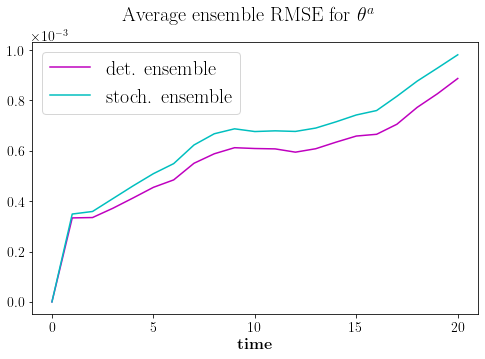

In [97]:
fig, ax = plt.subplots(1,figsize=(8, 5))

ax.plot(np.mean(temp_rmse_det, axis=1), color=c1, label=r'det. ensemble')
ax.plot(np.mean(temp_rmse_sto, axis=1), color=c2, label=r'stoch. ensemble')
ax.ticklabel_format(axis='y',style='scientific', scilimits=(0,0), useMathText=True)
ax.set_xticks(np.arange(0,n_tsteps,5))
# handles, labels = ax.get_legend_handles_labels()
# fig.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.68, 1.1), ncol=2) 
ax.legend()
fig.suptitle(r'Average ensemble RMSE for $\theta^a$ ')
ax.set_xlabel(r'${ \bf time }$')
plt.savefig('../plots/rand_ic/uq_avg_rmse_temp_det_ensem_v_sto_ensem_t25_onwards_rand_ic.pdf', bbox_inches='tight')